# Analisis Rekomendasi Tanaman dengan Klasifikasi
## 1. Persiapan dan Pengunduhan Dataset

# Install library yang diperlukan

In [3]:
%pip install kaggle
%pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Memanggil library depedency

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cek apakah dataset sudah ada

In [7]:
dataset_path = "Crop_recommendation.csv"
if not os.path.exists(dataset_path):
    try:
        from kaggle.api.kaggle_api_extended import KaggleApi
        api = KaggleApi()
        api.authenticate()
        api.dataset_download_files(
            'atharvaingle/crop-recommendation-dataset',
            path='.',
            unzip=True
        )
        print("✅ Dataset berhasil di-download!")
    except Exception as e:
        print(f"❌ Error: {e}")
        print("Pastikan Anda sudah:")
        print("1. Menginstal kaggle API (pip install kaggle)")
        print("2. Menyimpan token kaggle.json di ~/.kaggle/")
        print("3. Memberikan izin: chmod 600 ~/.kaggle/kaggle.json")
        # Jika di Google Colab, Anda perlu upload kaggle.json
        from google.colab import files
        files.upload()  # Upload kaggle.json
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
        print("\n🔑 Silakan upload kaggle.json Anda")
else:
    print("✅ Dataset sudah tersedia lokal")

✅ Dataset sudah tersedia lokal


## 2. Memuat Data dan Eksplorasi Awal

# Muat dataset

In [8]:
df = pd.read_csv("Crop_recommendation.csv")
print("🖥️ 5 Baris pertama dataset:")
display(df.head())

print("\n📊 Informasi dataset:")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")
print("\n🔍 Tipe data kolom:")
print(df.dtypes)

print("\n🌱 Jumlah unik tanaman:")
print(df['label'].value_counts())

🖥️ 5 Baris pertama dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



📊 Informasi dataset:
Jumlah baris: 2200, Jumlah kolom: 8

🔍 Tipe data kolom:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

🌱 Jumlah unik tanaman:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


## 3. Analisis Data dan Visualisasi

# Statistik deskriptif

In [9]:
print("\n📈 Statistik deskriptif:")
display(df.describe())


📈 Statistik deskriptif:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Visualisasi distribusi fitur

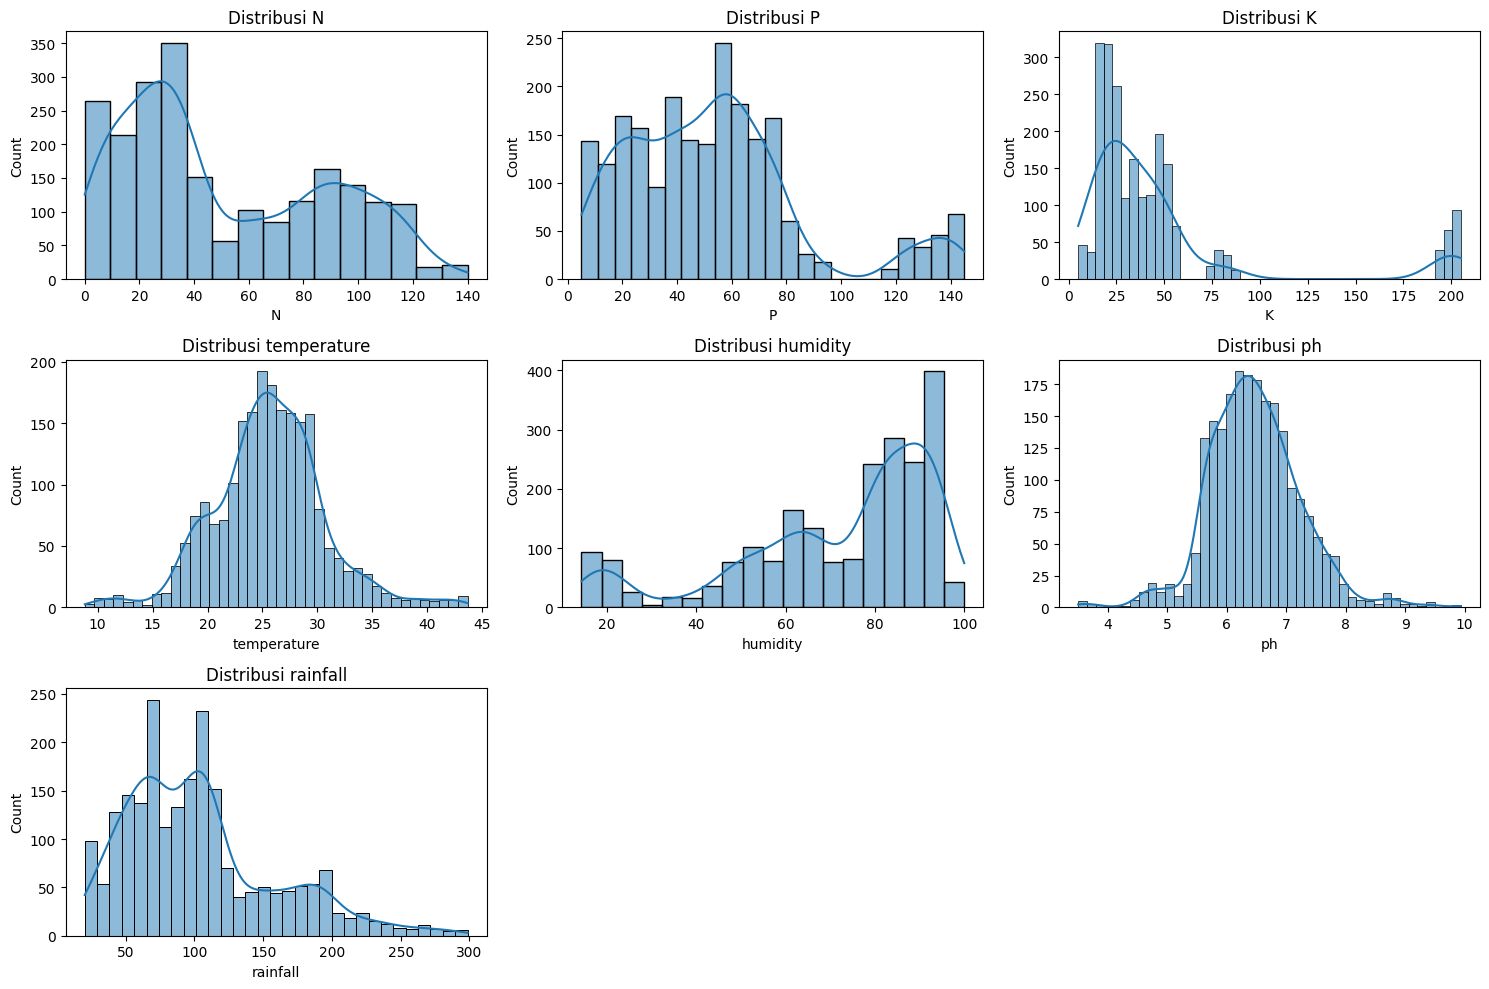

In [10]:
plt.figure(figsize=(15, 10))
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

# Visualisasi hubungan fitur dengan target

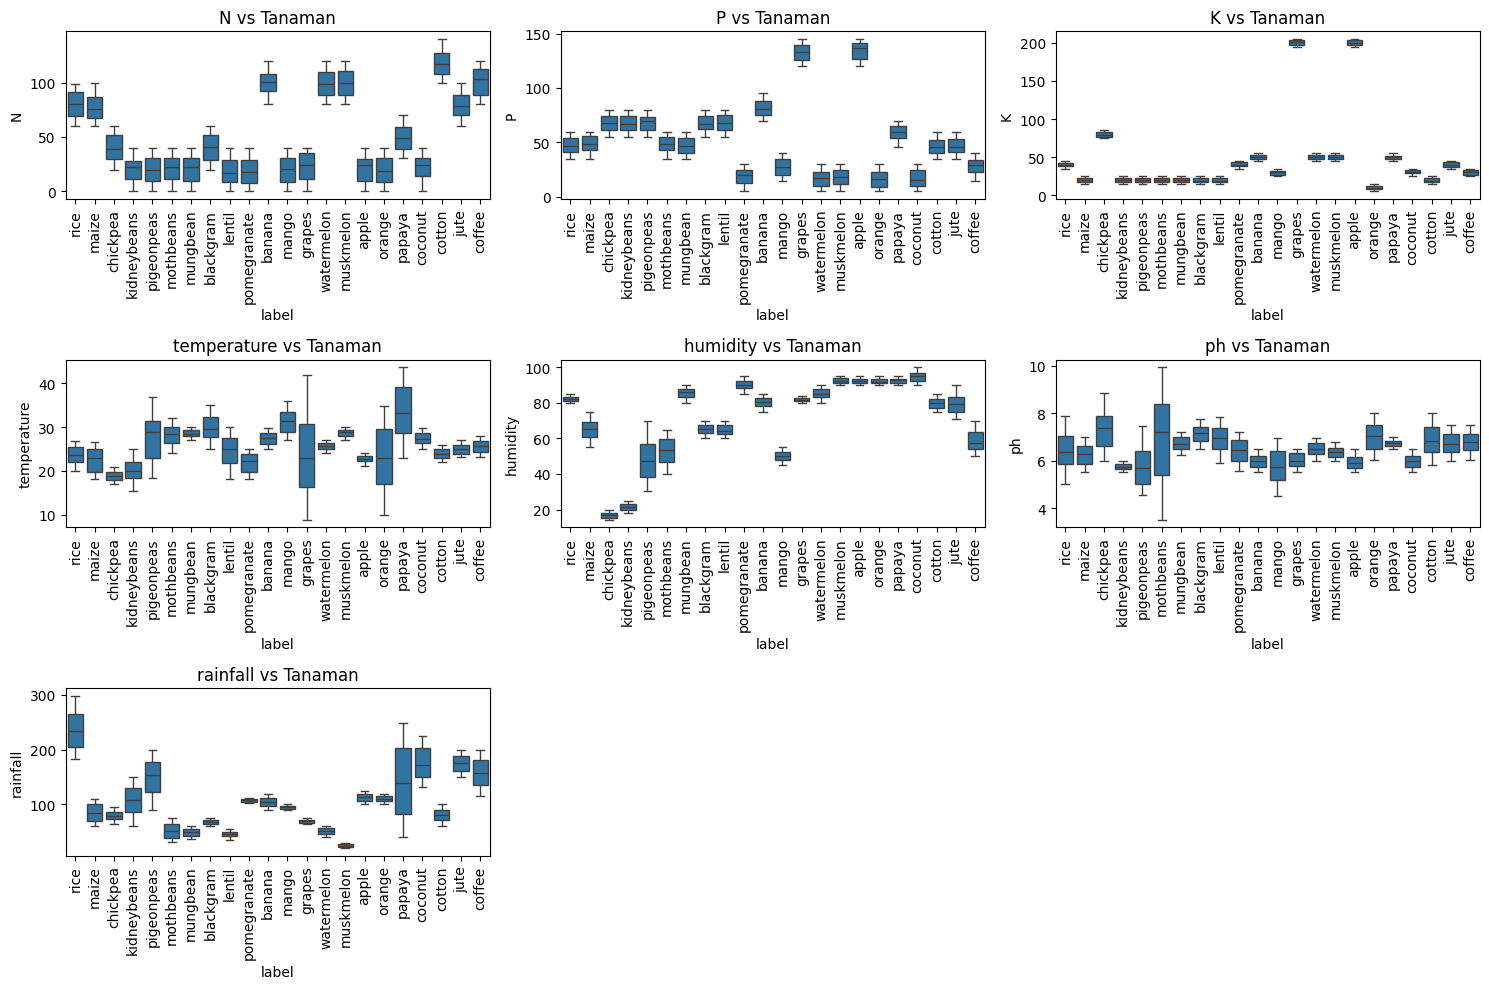

In [11]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'{feature} vs Tanaman')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 4. Persiapan Data untuk Klasifikasi

# Pisahkan fitur dan target

In [14]:
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']  # Target adalah label tanaman

# Split data (80% training, 20% testing)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # Untuk hasil yang dapat direproduksi
    stratify=y       # Mempertahankan distribusi kelas di train dan test
)

print("\n✂️ Pembagian dataset:")
print(f"Training set: {X_train.shape[0]} sampel")
print(f"Test set: {X_test.shape[0]} sampel")


✂️ Pembagian dataset:
Training set: 1760 sampel
Test set: 440 sampel


## 5. Membangun Model Klasifikasi

# Inisialisasi model Random Forest

In [16]:
model = RandomForestClassifier(
    n_estimators=150,    # Jumlah pohon di hutan
    max_depth=10,        # Kedalaman maksimum pohon
    min_samples_split=5,  # Jumlah sampel minimum untuk membagi node
    min_samples_leaf=2,   # Jumlah sampel minimum di daun
    random_state=42,      # Untuk hasil yang dapat direproduksi
    n_jobs=-1             # Gunakan semua core CPU
)

# Training model

In [17]:
print("⏳ Melatih model Random Forest...")
model.fit(X_train, y_train)
print("✅ Model selesai dilatih!")

⏳ Melatih model Random Forest...
✅ Model selesai dilatih!


## 6. Evaluasi Model

# Prediksi pada data test

In [18]:
y_pred = model.predict(X_test)

# Hitung akurasi

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Akurasi Model: {accuracy:.2%}")


🎯 Akurasi Model: 99.32%


# Laporan klasifikasi lengkap

In [20]:
print("\n📝 Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))


📝 Laporan Klasifikasi:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
   

# Confusion matrix

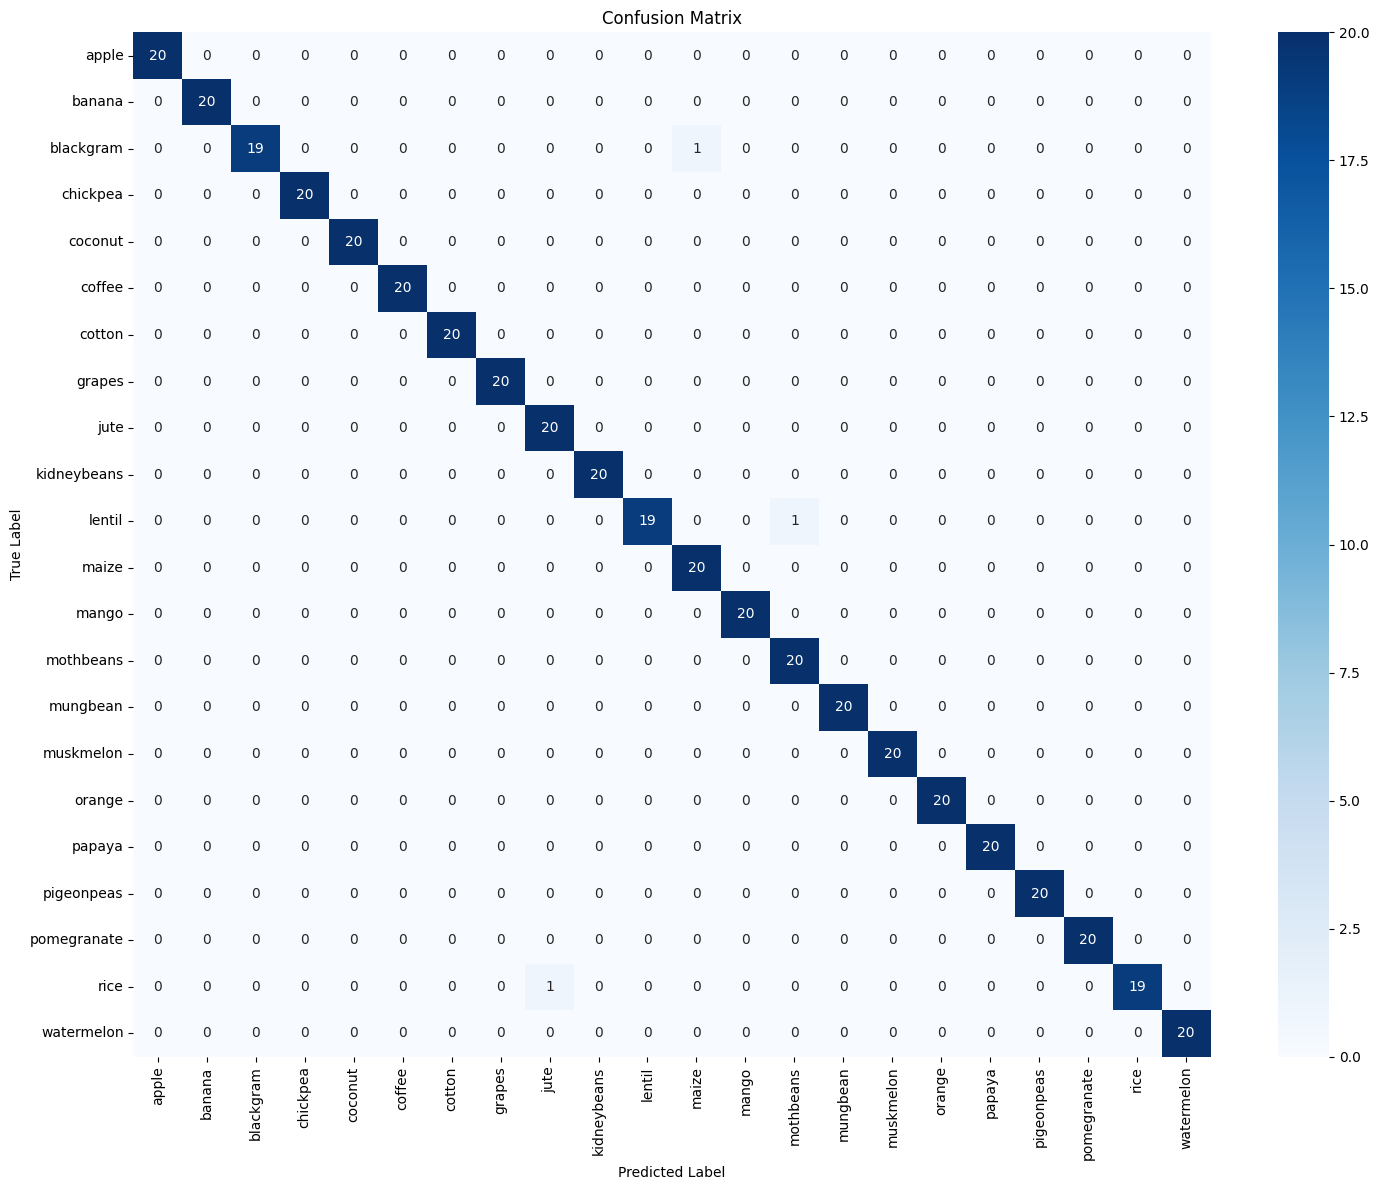

In [21]:
plt.figure(figsize=(15, 12))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 7. Analisis Fitur Penting

# Feature importance

/tmp/ipykernel_9894/3611900353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')


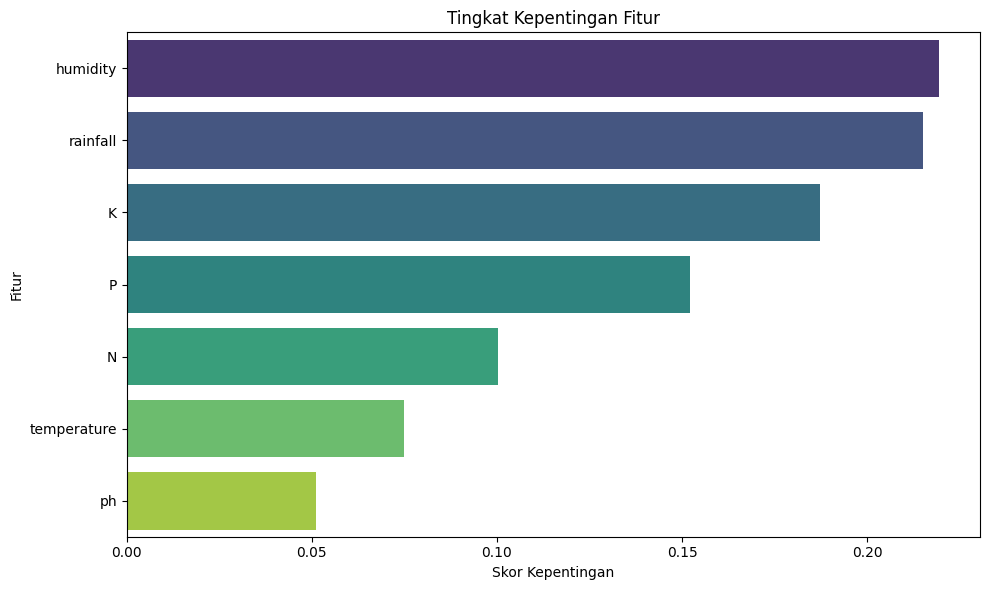

In [22]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')
plt.title('Tingkat Kepentingan Fitur')
plt.xlabel('Skor Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

## 8. Contoh Penggunaan Model

# Contoh prediksi untuk data baru

In [23]:
sample_data = {
    'N': [40],
    'P': [50],
    'K': [40],
    'temperature': [20],
    'humidity': [80],
    'ph': [6.5],
    'rainfall': [150]
}

sample_df = pd.DataFrame(sample_data)
prediction = model.predict(sample_df)
prediction_proba = model.predict_proba(sample_df)

print("\n🌾 Contoh Prediksi:")
print(f"Data sampel: {sample_data}")
print(f"Tanaman yang direkomendasikan: {prediction[0]}")
print(f"Probabilitas untuk semua tanaman:")


🌾 Contoh Prediksi:
Data sampel: {'N': [40], 'P': [50], 'K': [40], 'temperature': [20], 'humidity': [80], 'ph': [6.5], 'rainfall': [150]}
Tanaman yang direkomendasikan: papaya
Probabilitas untuk semua tanaman:


# Tampilkan probabilitas untuk semua kelas

In [24]:
for class_name, proba in zip(model.classes_, prediction_proba[0]):
    print(f"- {class_name}: {proba:.2%}")

- apple: 0.22%
- banana: 0.00%
- blackgram: 0.26%
- chickpea: 2.00%
- coconut: 1.62%
- coffee: 0.02%
- cotton: 0.00%
- grapes: 2.00%
- jute: 16.70%
- kidneybeans: 0.69%
- lentil: 0.00%
- maize: 0.00%
- mango: 0.67%
- mothbeans: 1.92%
- mungbean: 4.00%
- muskmelon: 0.00%
- orange: 0.67%
- papaya: 43.02%
- pigeonpeas: 2.69%
- pomegranate: 14.23%
- rice: 9.30%
- watermelon: 0.00%
